In [1]:
# Import packages
# Import pandas
import pandas as pd
import numpy as np


In [2]:
# read white wine dataset from file

dfw = pd.read_csv('C:\\Users\\Ramazan Ozturk\\Desktop\\python study\\Springboard studies\\capstone project Wine study\\winequality-white.csv', sep=';')

In [3]:
# print first 5 values of the dataset
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dfw.shape

(4898, 12)

In [5]:
dfw.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033

In [7]:
# Inspect missing values in the dataset
print(dfw.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
#Assign X and y values
y = dfw.quality
X = dfw.drop(['quality'], axis=1)

In [9]:
# import data training model
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Ramazan Ozturk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
# define clf classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [14]:
#fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
#print the feature_importances
print(clf.feature_importances_)

[0.00576575 0.09860122 0.03371803 0.01446925 0.13092401 0.02141364
 0.06452574 0.19209308 0.01241422 0.00089419 0.42518086]


In [16]:
#print the prediction of the classifier
print(clf.predict(X_test))
y_pred = clf.predict(X_test)

[6 6 6 ... 6 6 6]


In [17]:
# Import confusion_matrix

from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.5324675324675324
[[  1   0   3   3   0   0]
 [  0   0  23  23   0   0]
 [  0   0 252 218   2   0]
 [  0   0 132 588  11   0]
 [  0   0  19 265  20   0]
 [  0   0   1  47   9   0]]


In [18]:
# import mean squared error
from sklearn.metrics import mean_squared_error

In [19]:
mse = mean_squared_error(y_test, y_pred)

In [20]:
#root mean squared error, rmse
rmse = np.sqrt(mse)
#print rmse
print(rmse)

0.8134612671466322


In [21]:
# import matplotlib
import matplotlib.pyplot as plt

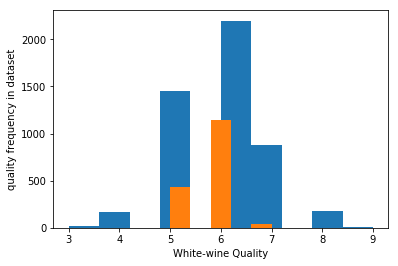

In [22]:
#plotting white wine quality
plt.hist(dfw.quality)
plt.hist(y_pred)
plt.xlabel('White-wine Quality')
plt.ylabel('quality frequency in dataset')
plt.show()